## Optimization

- Here we introduce methods for estimating unconstrained maximization problems with continuous functions.


| type              |                   category                  | method name                                              |
|:------------------|:-------------------------------------------:|----------------------------------------------------------|
| 1. non-gradients  |                 grid search                 |                                                          |
| 1. non-gradients  |                simplex method               | **Nelder-Mead**                                          |
| 1. non-gradients  |                   others                    | simulated annealing,<br> particle swarm, etc.            |
| 2. gradient-based |           based only on gradients           | **gradient ascent**,<br> **conjugate gradient ascent**, etc. |
| 2. gradient-based |        based on gradients and Hessian       | **Newton-Raphson**,<br> Newton with trust region, etc.   |
| 2. gradient-based | based on gradients and approximated Hessian | **BFGS, DFP, BHHH**                                      |

### Bracketing (univariate)

><div class="alert alert-block alert-info"> 
> Using only the function value to identify an interval in which the minimum/maximum lies.
></div>

- May use the interval to find/refine initial values, or, continue to shrink the interval and find solutions

- The method requires $f(x)$ to be **unimodality**:

  - A unimodal function $f(x)$ is one where there is a unique $x^*$  that minimize/maximize the function.
  
  - $f(x)$ is monotonically decreasing for $x\leq x^*$ and monotonically increasing for $x \geq x^*$. 

  - We can *bracket* an interval $[a, c]$ containing the global minimum/maximum if we can find three points $a < b < c$ such that $f(a) > f(b) < f(c)$.

  - Non-unimodal functions, such as exp(x), cannot be bracketed.
  

#### A Simple Bracketing Method 

The goal: Given a point $a$, find a bracket $[a,c]$ which would bracket the minimum in between. For the maximum, just doing the opposite.

- Start at a given point and take a step "$s$" in the positive direction (i.e., $s=1$e-2). 
  - $(a, f(a)) \rightarrow (a+s, f(a+s)) = (b, f(b))$ where $s>0$.
  
- Find the downhill direction by comparing $f(a)$ and $f(b)$.
  - If $f(b) > f(a)$, then we should move in the opposite direction. It means we should set $s<0$.
 
- Move in the correct direction. Following from the above, it should be the negative direction.
  - $(a, f(a)) \rightarrow (a-s, f(a-s)) = (c, f(c))$

- Compare the new ($f(c)$) value to the old ($f(a)$) value. The new value would be continuing decreasing if it has not exceeds the lowest point. Stop when $f(b) > f(a)$.

- We often gradually increase the step size $s$ by updating it according to $s = k*s$ where $k = 1, 2, \ldots$. The idea is to go as far as possible.


#### Other Bracketing Methods

There are other more refined methods, including the Fibonacci search, golden section search, quadratic fit search, Shubert-Piyavskii method, etc.



### Newton's Method for optimization: univariate

- To put it simply, the Newton's method of optimization uses a quadratic function to approximate the objective function $f(\theta)$ at $\theta_0$(initial maximizer)
    - the maximizer $\theta_1$ (in the case of maximization) of the former is considered the maximizer of the latter
    - If, after evaluating, $\theta_1$ is not good enough for $f(\theta)$, another round of quadratic approximation to $f(\theta)$ at $\theta=\theta_1$ is carried out and the new maximizer is considered and evaluated
    - The process continues until the maximizer of the approximated quadratic function is a *good* solution for maximizing $f(\theta)$.

 - The method is also referred to as the **Newton-Raphson** method.


In [1]:
# Newton method optimization

# The following requires `Plots` version v1.25.10 or newer
# Check your version: using Pkg; Pkg.status("Plots")
# If need to update: using Pkg; Pkg.update("Plots")

using Interact, WebIO, Plots

ϵ = 1e-7

g(x) = -(1/50)*(x^4+x^2) + 5.5
derive_1(a) = (g(a+ϵ)-g(a))/ϵ                      # first derivative
derive_2(a) = (derive_1(a+ϵ)-derive_1(a))/ϵ        # second derivative
t(x, x_0) = g(x_0) + derive_1(x_0)*(x-x_0) + (1/2)*derive_2(x_0)*(x-x_0)^2        # 2nd order taylor series at x_0 

x₀ = -3.3
x₁ = x₀ - derive_1(x₀)/derive_2(x₀)
x₂ = x₁ - derive_1(x₁)/derive_2(x₁)
x₃ = x₂ - derive_1(x₂)/derive_2(x₂)
h_1(x) = t(x,x₀)
h_2(x) = t(x,x₁)
h_3(x) = t(x,x₂)

@manipulate for i in (1,2,3,4,5,6,7,8)
    plot(g, aspect_ratio=1, xlim=[-4,4], ylim=[0,6], label="g(x)", linewidth=3)

    scatter!(i >= 2 ? ([x₀], [g(x₀)]) : ([],[]), label=false)                                        
    annotate!([x₀+0.1], [g(x₀)], text(i >= 2 ? "g(x₀)" : "", :left, 9))
    quiver!([x₀], [0], quiver= i >= 2 ? ([0],[g(x₀)]) : ([0],[0]), ls=:dash, color=:green)
    annotate!([x₀], [0], text(i >= 2 ? "x₀" : "", 9))
    plot!(i >= 3 ? h_1 : (), label=false, color=:green)

    scatter!(i >= 4 ? ([x₁], [g(x₁)]) : ([],[]), label=false)
    annotate!([x₁-.1], [g(x₁)+.4], text(i >= 4 ? "g(x₁)" : "", :left, 9))
    quiver!([x₁], [0], quiver= i >= 4 ? ([0],[g(x₁)]) : ([0],[0]), ls=:dash, color=:purple)
    annotate!([x₁], [0], text(i >= 4 ? "x₁" : "", 9))
    plot!(i >= 5 ? h_2 : (), label=false, color=:purple)

    scatter!(i >= 6 ? ([x₂], [g(x₂)]) : ([],[]), label=false)
    annotate!([x₂-.2], [g(x₂)+.3], text(i >= 6 ? "g(x₂)" : "", :left, 9))
    quiver!([x₂], [0], quiver= i >= 6 ? ([0],[g(x₂)]) : ([0],[0]), ls=:dash, color=:red)
    annotate!([x₂], [0], text(i >= 6 ? "x₂" : "", 9))
    plot!(i >= 7 ? h_3 : (), label=false, color=:red)
    
    scatter!(i >= 8 ? ([x₃], [g(x₃)]) : ([],[]), label=false)
    annotate!([x₃], [g(x₃)+.3], text(i >= 8 ? "g(x₃)" : "", :left, 9))
    quiver!([x₃], [0], quiver= i >= 8 ? ([0],[g(x₃)]) : ([0],[0]), ls=:dash, color=:blue)
    annotate!([x₃], [0], text(i >= 8 ? "x₃" : "", 9))    
end

WebIO._IJuliaInit()


(process:11612): GLib-GIO-WARNING **: 01:56:50.603: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.3.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 46 extensions but has no verbs


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "1", "val" => 1, "id" => "idtlDa49wl"), OrderedDict{String, Any}("key" => "2", "val" => 2, "id" => "id2lq8IMB8"), OrderedDict{String, Any}("key" => "3", "val" => 3, "id" => "idGwu4BzoZ"), OrderedDict{String, Any}("key" => "4", "val" => 4, "id" => "id5KIP02aC"), OrderedDict{String, Any}("key" => "5", "val" => 5, "id" => "idF6IxfPNo"), OrderedDict{String, Any}("key" => "6", "val" => 6, "id" => "id9lVBQj5P"), OrderedDict{String, Any}("key" => "7", "val" => 7, "id" => "idBmsOKzyN"), OrderedDict{String, Any}("key" => "8", "val" => 8, "id" => "idEKUxn1Wk")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\opott\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\opott\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\opott\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\opott\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\opott\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007171be10, Task (runnable) @0x000000007171be10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].in

- Suppose we are interested in the following problem.

\begin{equation}
  \max_\theta f(\theta)
\end{equation} 

- **Use the 2nd-order Taylor series to approximate the function $f(\theta)$ at $\theta_0$. Call it $h(\theta)$.**

\begin{equation}
 f(\theta) \approx  \underbrace{f(\theta_0) + f'(\theta_0)(\theta-\theta_0) + \frac{1}{2}f''(\theta_0)(\theta-\theta_0)^2}_{\equiv h(\theta)}.
\end{equation}


- **Find the maximizer of $h(\theta)$ by applying the first-order condition (e.g., $h'(\theta)=0$).**

\begin{align}
  h'(\theta) & = f'(\theta_0) + f''(\theta_0)(\theta-\theta_0)=0, \\
 \notag \\
\Longrightarrow \quad   \theta & = \theta_0 - \frac{f'(\theta_0)}{f''(\theta_0)}.
\end{align}


- Looking at the formula, Newton's method for finding roots can be converted to finding the minimum and the maximum of a function $f(\theta)$ by substituting $f'()$ for $g()$ and $f''()$ for $g'()$
    - So, the updating equation is essentially:
   \begin{equation}
    \theta_{i}  = \theta_{i-1}  -\frac{f'(\theta_{i-1})}{f''(\theta_{i-1})}.
   \end{equation} 


- The idea of Newton's optimization method is intuitive
1. given point $\theta_0$, we use a quadratic function $h(\theta)$ evaluated at $\theta=\theta_0$ to approximate the objective function $f(\theta)$
2. use $h(\theta)$'s maximizer (call it $\theta_1$) as a proxy for $f(\theta)$'s maximizer (call it $\theta^*$)
    - Because $h(\theta)$ is only an approximation to $f(\theta)$, $\theta_1$ would not, in general, be exactly equal to $\theta^*$
    - $\theta_1$ should be closer to $\theta^*$ than $\theta_0$ is(we are moving closer to the true value)
3. repeat the iterative process until $\theta_j$ is sufficiently close to $\theta^*$. 


##### converge criterion
1. the distance of funciton value < $\epsilon$
2. the distance of maximizer < $\epsilon$
3. $|f'(x)| < \epsilon$

####  Refinement: Choosing the Step Size (*line search*)


- Note that the term $d = -\frac{f'(\theta_{i-1})}{f''(\theta_{i-1})}$ contains both the _**direction**_ and the _**distance**_ information regarding how to do the next move.
  - (_direction_:) If $d > 0$, it means $\theta_i > \theta_{i-1}$ and we should move to the right to find the solution.
  - (_distance_:) The size $|d|$ is an indicator of how far the new value $\theta_i$ is away from the true maximizer. If the size is large, it usually (though not always) means that the distance is far.

[//]: # "The size $|d|$ is an indicator of how far the new value $\theta_i$ is away from the old value $\theta_{i-1}$." 


- could I take a _larger_ step to the right instead of the one indicated by $|d|$? Could I move 1.2X, 1.5X, or 3X of the distance?
    - The answer is yes
    - and we can actually do so to take the full advantage of the current information
    - The idea could actually go the other way around
        - In this case stepping in the 0.5X or 0.2X of the distance could be desired.


- In any event, instead of going $d$, we should go for $s\times d$ where $s>0$ is the _**step size**_. 

   \begin{align}
   \theta_{i}  & = \theta_{i-1} - s \frac{f'(\theta_{i-1})}{f''(\theta_{i-1})} \\
               & = \theta_{i-1} - s d.
   \end{align} 

  - Start with $s=1$.
  - If $f(\theta_{i-1} + d) < f(\theta_{i-1})$ (in the case of minimization), try $s=2$. If $f(\theta_{i-1} + 2d) < f(\theta_{i-1} + d)$, try $s=3$, and so on.
  - If $f(\theta_{i-1} + d) \geq f(\theta_{i-1})$, back up and try $s=0.5, 0.25$, etc.


- The step size could be calculated in a more sophisticated way
    - there are _**line search**_ algorithms specialized in doing it
    - In general, the step size is chosen to maximize the objective function.


- The refinement is useful because it reduces the number of times needed to evaluate $f'()$ and $f''()$
    - This time-saving issue is particularly relevant when $f'()$ and $f''()$ are expensive to evaluate
    - For instance, a multi-variate function with many variables (so the Hessian is large), or functions that require numerical integrations
- By smartly choosing the step size $s$, we reduce the number of times that are needed to evaluate the functions
    - Quite a few algorithms are available for choose the optimal step size. 
 
 
  
##### Remarks

- "Step size" as defined above is also referred to as the _**gain**_ or the _**learning rate**_ (particularly in machine learning), since it indicates the extent to which new information is used to improve the existing status, thus "learning".


- I saw in some places the step size is defined as $\theta_i - \theta_{i-1}$, but this definition is used rarely.


#### Remark on Non-Concavity

- If $f''(\theta_{i-1})=0$, the updating rule would fail. Some numerical tricks could be used to try to get out of the trap.



#### Remarks on the local and the global maximum

- Newton's method starts the action by using information from $\theta_0$
    - The information on other parts of the objective function is not used
    - Because it uses information local to $\theta_0$, Newton's method is labeled as a _**local method**_ and it would converge to a _**local maximum**_ located in the neighborhood of $\theta_0$ 

- For local methods, trying different initial values are *useful* in making sure that the solution is stable and we could feel confident in accepting it as a global maximum
    - It is not guaranteed, however, that the found solution is indeed the global maximum.  


- There are _**global methods**_ which search widely the parameter space and compare results before determining where to go
    - The methods include the particle swarm, genetic algorithm, simulated annealing, etc.. These methods, however, tend to be very slow.

#### Secant Method (approximating 2nd derivatives)

- Newton's method requires the analytic form of the 2nd derivative of $f()$ to be known. Alternatively, we may numerically approximate the 2nd derivative.

- There are different ways to do the 2nd-differentiation approximation (recall the method we introduced in another class). The _**secant method**_ uses the last two iterates to do the approximation. That is,

\begin{equation}
 f''(\theta_{i-1}) \approx \frac{f'(\theta_{i-1})-f'(\theta_{i-2})}{\theta_{i-1} - \theta_{i-2}}.
\end{equation}

Note that we may have $\theta_{i-1} = \theta_{i-2}+\epsilon$, and so the formula is akin to the forward difference formula of the finite difference. Substituting it into the Newton's updating equation, we have the secant-based updating equation:

\begin{align}
\theta_{i}   = \theta_{i-1} - s \frac{\theta_{i-1} - \theta_{i-2}}{f'(\theta_{i-1})-f'(\theta_{i-2})}f'(\theta_{i-1}).
\end{align} 


##### Remarks
- No additional function evaluations are needed.
- In the beginning of the optimization, we need to provide two (instead of one) initial values ($x_{0,a}$, $x_{0,b}$) to start the iteration.

### Newton's method for optimization: multivariate 


Let's find a vector $\mathbf{\theta}^*$ such that $f(\mathbf{\theta}^*)$ is maximized. A few notations first: 
- $g(\theta)$: the gradient vector of $f(\theta)$ (first derivatives).
- $H(\theta)$: the Hessian matrix of $f(\theta)$ (second derivatives).
- $s$: step size.

The optimization procedure is the follows.

>###### 1. Take an initial guess at $\mathbf{\theta}_0$.
>
>###### 2. Update the guess by choosing $\mathbf{\theta}_1$ according to
>\begin{align}
 \mathbf{\theta}_i & = \mathbf{\theta}_{i-1} - s \{H(\mathbf{\theta}_{i-1}) \}^{-1}g(\mathbf{\theta}_{i-1})\\
          & = \mathbf{\theta}_{i-1} + s \{-H(\mathbf{\theta}_{i-1}) \}^{-1}g(\mathbf{\theta}_{i-1})\\
          & \equiv \mathbf{\theta}_{i-1} + s  d
\end{align}
>
>
>###### 3. Repeat the process until some convergence criterion is met, such as
>  - based on the change in the function value: $|f(\theta_i) - f(\theta_{i-1})| \leq \varepsilon$,
>  - based on the norm of the changes in the parameter vector (coefficients): $||\theta_i - \theta_{i-1}|| \leq \varepsilon$,
>  - based on the norm of the gradient vector: $||g(\theta_i)|| \leq \varepsilon$.

#### Remark

- Hessian matrix is symmetric. It is said to be positive definite at a point if all the eigenvalues of the Hessian matrix are positive.

- If $-H()$ is not invertible, the Newton's method would fail. It happens if the function at the evaluation point has a ridge, a flat section, or a saddle point. All these result in flat gradients. 

- In practice, nevertheless, there are numerical tricks that may help us to get out of the situation when trouble happens. For instance, if we find $-H()$ un-invertible, we may substitute $-H()$ by the identify matrix $\mathbf I$, or $-H() + c\mathbf{I}$ for some small, positive scalar $c$, or some other matrix related to $-H()$.
  
- The method convergences quickly. When it is closer to the true minimizer, it exhibits the property of _quadratic convergence_: at each iteration, the significant digits of approximation would double.

- If the objection function itself is a quadratic function, then the 2nd-order Taylor series is not an *approximation* but the *exact same* quadratic function. It requires only one iteration to reach the maximum/minimum.

- The sequence is not guaranteed to converge.

- It can be sensitive to initial values. If the initial values are far away from the true values, the formula can be grossly inaccurate. It is therefore recommended to use grid or simplex methods, both of which do not rely on gradients, to narrow down the range of solutions before using the Newton's method.

- The number of function evaluation increases quickly with the number of parameters.

- The vanilla Newton' method has no step length, which may cause overshooting. So, step length is important.



### Quasi-Newton Methods

> <div class="alert alert-block alert-info"> 
> Computing the Hessian is expensive. Approximate the Hessian using less-expensive methods.
> </div>

Recall that the essential part of the Newton's method is calculating the direction equation $d = \{-H(\mathbf{\theta}_{i-1}) \}^{-1}g(\mathbf{\theta}_{i-1})$, which involves the gradient and the Hessian. They are both expensive to evaluate, particularly for the Hessian. Various Quasi-Newton methods try to substitute the Hessian (BHHH) or the inverse Hessian (BFGS, L-BFGS, DFP) in the equation by some approximation. The hope is to retain fast convergence at a lower cost.


#### The BHHH algorithm 

The BHHH algorithm is a statistical-approximation based method which uses the outer product of gradients to approximate the negative Hessian matrix.
\begin{equation}
 -H(\theta_i) \approx -\tilde{H}(\theta_i) = \sum_{j=1}^{N} g_j(\theta_i) g_j(\theta_i)'.
\end{equation}



- Brendt, Hall, Hall, and Hausman (1974), Annals of Economic and Social Measurement.
- statistical approximates the Hessian matrix
- It is noted that the outer product approximation is only valid for maximizing log-likelihood function and hence this method is usually not found in general-purpose optimizers.



#### The BFGS and the DFP algorithms


Both of the algorithms use secant updates to approximate the **inverse** of the negative Hessian matrix, and the updates are **recursive**.

These two methods are quite similar and they differ only in finer details. They start the approximation using a simple matrix such as the identify matrix, and then update the matrix using $\Delta \theta_i$ and $\Delta g(\theta_i)$. We omit the details here. 

- BFGS: Broyden (1967), Fletcher (1970), Goldfarb (1970), and Shanno (1970).
- DFP: Davidon (1959), Fletcher (1970), Powell (1963).
- secant updates the Hessian matrix
- BFGS is a bit more sophisticated than DFP and thus the former is used more often. 


#### The L-BFGS algorithm

Recall that the various quasi-Newton methods all try to lower the computational cost of the Newton methods. Among them, the BFGS is perhaps the most often used. However, for large problems, the **recursive updates** of BFGS could still be computationally expensive: it is slow and requires a large amount of momory. This could be a serious issue for machine learning or big data analysis where. The *limited-memory BFGS*, or L-BFGS, is developed to approximate BFGS in a way that makes the computation even more efficient. Essentially, L-BFGS would use only the last $m$ values of $\Delta \theta_i$ and $\Delta g(\theta_i)$, rather than the full history of them, in the recursive update of the inverse Hessian matrix. It saves memory space and speeds up computation. In machine learning where sizes of problems are often very large, the L-BFGS is often the method of choice.

### Gradient Ascent

> <div class="alert alert-block alert-info"> 
> Using only the gradients to update parameters.
> </div>
    
Recall in the Newton's method, the updating equation is

\begin{align}
 \mathbf{\theta}_i & = \mathbf{\theta}_{i-1} - s \{H(\mathbf{\theta}_{i-1}) \}^{-1}g(\mathbf{\theta}_{i-1})\\
          & = \mathbf{\theta}_{i-1} + s \{-H(\mathbf{\theta}_{i-1}) \}^{-1}g(\mathbf{\theta}_{i-1}).
\end{align}

Use a more general notation, we could write it as

\begin{align}
 \mathbf{\theta}_i & = \mathbf{\theta}_{i-1} + s P^{-1}g(\mathbf{\theta}_{i-1}),
\end{align}

where $P$ is a positive semi-definite matrix for a maximization problem.


If $P$ is the negative of Hessian, we get the Newton's method. If $P$ is simply an identity matrix with the appropriate dimension, then 

\begin{align}
\mathbf{\theta}_i  = \mathbf{\theta}_{i-1} + s g(\mathbf{\theta}_{i-1})
\end{align}

is the _**gradient ascent**_ method where only the information of the gradient (but not the information of the curvature) is used. With the gradient ascent method, the iteration moves in the direction of the gradient.


- "_**Gradient ascent**_" and "_**steepest ascent**_" are sometimes used interchangeably. However, there are authors emphasizing that the "steepest ascent" is a method that takes into account the step size ("$s$" in the equation), and so the formulation presented above could be suitably labeled as the "steepest ascent" method. Nevertheless, if $s=1$, the two terms mean exactly the same thing.


- Do not confuse the _**gradient ascent methods**_ with the _**gradient-based methods**_. The gradient ascent method is a type of gradient-based methods. See the summary table at the beginning of the Optimization section.


- There are also _**non-gradient based methods**_, such as the Nelder-Mead method (i.e., simplex type) and the particle swarm method (i.e., the global optimization type).


### Conjugate Gradient Methods

> <div class="alert alert-block alert-info"> 
> Using conjugate gradients so that a new update does not overlap or negate previous updates.
> </div>
> <div class="alert alert-block alert-warning"> 
> <b>Definition:</b> given that $\mathbf{u}, \mathbf{v} \in \mathbf{R}^n$ , then $\mathbf{u}$ and $\mathbf{v}$ are said to be mutually orthogonal
if $\mathbf{u}^{T}\mathbf{v} = 0$.<br><br>
<b>Definition:</b> given that $\mathbf{u}, \mathbf{v} \in \mathbf{R}^n$, then $\mathbf{u}$ and $\mathbf{v}$ are said to be mutually conjugate
with respect to a symmetric positive definite matrix $\mathbf{A}$ if $\mathbf{u}^{T}\mathbf{Av} = 0$.
>    
> - If $\mathbf{u}$ and $\mathbf{v}$ are mutually conjugate vectors, they are linearly independent to each other. </div>
    
    


For the gradient ascent methods, the choice of step size affects the convergence rate. If the step size is too large, the convergence path may be zigzagging (left graph). It implies that the direction may be overlapping or negating previous steps, both of which result in inefficient moves. If the step size is too small, it takes many updates to research the solution which is slow (right graph).

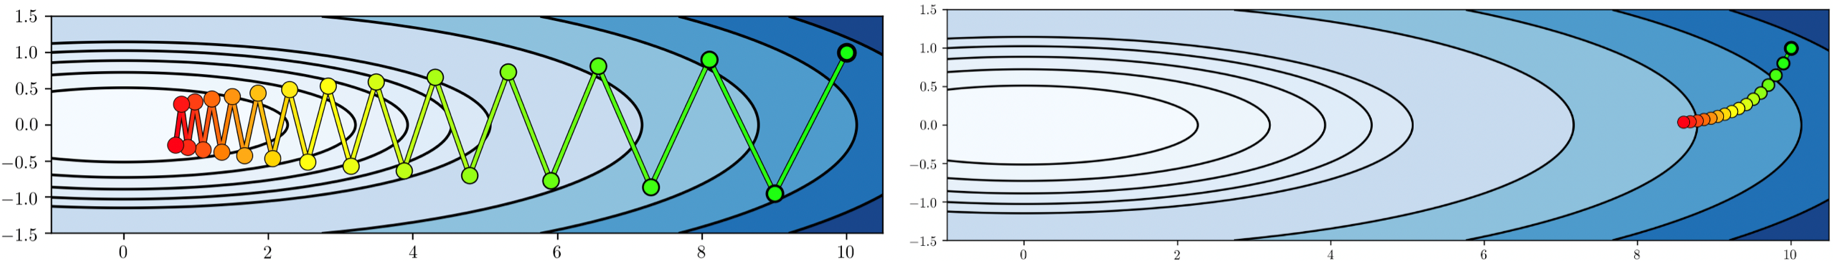


Could we walk in long strides while avoiding the pitfalls of zigzagging? The answer is yes and the _**conjugate gradient**_ is proposed for this purpose. The strategy, to put it simply, is to choose a direction that is in conjugacy with subsequent search directions. So, the sequence of directions do not offset each other; there is no detour and the path is short. 

This is done by taking into account the last iteration's direction ($d_{i-1}$) weighted by $\beta_i$ to make sure that the past and the current directions are conjugate. That is,

\begin{align}
\mathbf{\theta}_i  = \mathbf{\theta}_{i-1} + s_i d_i 
\end{align}

where

\begin{align}
d_i = g(\theta_{i-1}) + \beta_i d_{i-1}
\end{align}


Various rules are possible for calculating $\beta$ (e.g. Polak-Ribiere). Conjugacy will eventually be lost, so the search direction must periodically be reset to the steepest descent direction.


    
    

### Grid Search

> <div class="alert alert-block alert-info"> 
> Use no gradients. Discretize the parameter space into fine grid and selecting the values which achieves the maximum on the grid.
> </div>
 
The brute-force method is feasible when the dimension of the parameter space is small. One advantage of the approach is that no derivatives are needed, which can be useful if differentiation is complicated. When the objective function is globally concave, the approach will find an approximation to the maximum. While care should be exercised in taking them as final estimates, grid estimates are useful as initial conditions for other algorithms.

### Nelder-Mead

  - Instead of using gradient information, Nelder-Mead is a direct search method. The algorithm begins by evaluating the objective function at n + 1 points. These n + 1 points form a so-called simplex in the n-dimensional decision space. It keeps track of the function values at these n + 1 points and performs one of four actions: reflect, expand, contract, or shrink. Basically, the goal is to iteratively replace the worst point with a better point. More information can be found in Nelder and Mead (1965), Lagarias, et al (1998) or Gao and Han (2010). (based on Optim.jl)
  
  - This method is simple and has demonstrated enduring popularity, despite the later discovery that it fails to converge at all for some functions (and examples may be constructed in which it converges to point that is not a local minimum). Anecdotal evidence suggests that it often performs well even for noisy and/or discontinuous objective functions. (based on NLopt.jl document)
  


# Final Remark


- non-gradient methods vs. gradient-based methods:
  - Non-gradient methods are less sensitive to local conditions and convergence is generally not guaranteed.
  - Gradient-based methods are sensitive to local conditions and can converge more quickly. The downside is that if the initial values are not good and the local information is inadequate (such as a flat profile of the function), the methods may be stuck and the convergence fails.  
  - A useful strategy is to use non-gradient methods for zooming into the maximum's neighborhood before switching to the gradient-based methods. 
